#### __Importing Libraries__

In [59]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from datetime import date,timedelta
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#### __Data Collection__

In [60]:
stockTickers = list(pd.read_csv('https://archives.nseindia.com/content/indices/top10nifty50_030724.csv')['SYMBOL']+'.NS')
stockTickers

['HDFCBANK.NS',
 'RELIANCE.NS',
 'ICICIBANK.NS',
 'INFY.NS',
 'LT.NS',
 'TCS.NS',
 'ITC.NS',
 'BHARTIARTL.NS',
 'AXISBANK.NS',
 'SBIN.NS']

In [61]:
startDate, endDate = date(2021,1,1), date(2022,12,31)
tradingDays = 252 
rfRate = 0.06 
investmentFund = 100000000 # 10 Million

##### __Import Data__

In [62]:
spotData = yf.download(tickers = stockTickers,start = startDate, end = endDate)['Adj Close'].fillna(method = 'bfill')
indexData = yf.download(tickers = '^NSEI', start = startDate,end = endDate)['Adj Close'].fillna(method = 'bfill')

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


#### __Equity Returns__

In [63]:
class Returns:
    def __init__(self,data):
       self.data = data

    def AbsoluteReturns(self):
        return self.data.diff().iloc[1:]
        
    def DiscretePropotionalReturns(self):
        return self.data.pct_change().iloc[1:]
        
    def ContinousPropotionalReturns(self):
        return np.log(1+ self.data.pct_change()).iloc[1:]


In [64]:
spotData

Ticker,AXISBANK.NS,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2021-01-01,621.093811,501.116852,1368.017456,514.302124,1171.958374,183.908066,1242.344116,1815.729614,262.983643,2726.469727
2021-01-04,621.989929,503.013763,1359.329712,518.397095,1197.806519,183.521072,1259.202637,1818.790161,264.536713,2830.007324
2021-01-05,661.567505,499.998199,1369.601318,523.808228,1202.967041,181.844116,1251.252441,1796.179077,265.195618,2879.866455
2021-01-06,651.411743,510.990356,1363.697632,533.021790,1192.088257,176.641205,1258.627930,1748.810181,268.301697,2841.226562
2021-01-07,668.188599,530.396912,1359.569580,527.561829,1173.539062,174.405212,1282.526367,1745.978027,270.796021,2823.814941
...,...,...,...,...,...,...,...,...,...,...
2022-12-26,926.078674,807.291748,1589.273315,878.643677,1455.328857,317.026215,2051.543945,2321.496582,576.057739,3104.079102
2022-12-27,929.568726,811.074341,1590.882568,885.972229,1467.388672,315.652374,2083.969482,2340.489746,580.688599,3110.377441
2022-12-28,922.089966,800.124634,1589.614746,884.299988,1462.835938,316.836761,2081.026123,2340.259766,579.868530,3108.087158


In [65]:
spotReturns = Returns(data = spotData).DiscretePropotionalReturns()
indexReturns = Returns(data = indexData).DiscretePropotionalReturns()

#### **Portfolio Construction**
**Risk Return Profile**

In [66]:
# Individual Securities

riskReturnProfile = pd.DataFrame({
    'Mean': spotReturns.mean() * tradingDays,
    'Standard Deviation': spotReturns.std() * np.sqrt(tradingDays)
}, index = spotReturns.columns)

riskReturnProfile['Sharpe Ratio'] = (riskReturnProfile['Mean'] - rfRate) / riskReturnProfile['Standard Deviation']
riskReturnProfile

,Mean,Standard Deviation,Sharpe Ratio
Ticker,,,
AXISBANK.NS,0.249929,0.296252,0.641107
BHARTIARTL.NS,0.272985,0.258401,0.824243
HDFCBANK.NS,0.106511,0.248339,0.187289
ICICIBANK.NS,0.308474,0.273995,0.906858
INFY.NS,0.142413,0.245672,0.335460
ITC.NS,0.299873,0.233614,1.026793
LT.NS,0.285861,0.252477,0.894579
RELIANCE.NS,0.164121,0.262449,0.396728
SBIN.NS,0.458607,0.301968,1.320032


In [67]:
riskReturnProfile[riskReturnProfile['Sharpe Ratio'] == riskReturnProfile['Sharpe Ratio'].max()]

,Mean,Standard Deviation,Sharpe Ratio
Ticker,,,
SBIN.NS,0.458607,0.301968,1.320032


The stock with the maximum Sharpe ratio is considered the best return-giving stock in a portfolio. The Sharpe ratio measures risk-adjusted return, making it a crucial metric. A higher Sharpe ratio indicates better performance relative to risk. Thus, selecting stocks with high Sharpe ratios can optimize portfolio returns.

#### __Index__

In [68]:
riskReturnProfile_i =  pd.DataFrame({
    'Mean': indexReturns.mean() * tradingDays,
    'Standard Deviation': indexReturns.std() * np.sqrt(tradingDays)
},index =['NIFTY50'])

riskReturnProfile_i['Sharpe Ratio'] = (riskReturnProfile_i['Mean'] - rfRate) / riskReturnProfile_i['Standard Deviation']
riskReturnProfile_i

,Mean,Standard Deviation,Sharpe Ratio
NIFTY50,0.143913,0.165201,0.507945


#### Asset Allocation

**01 : Equally Weighted Portfolio**

In [69]:
equalWeights = np.array([1/len(stockTickers)] * len(stockTickers))
print(round(sum(equalWeights)),equalWeights)

1 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [70]:
portfolioReturns = spotReturns.dot(equalWeights)

riskReturnProfile = pd.DataFrame ({
        'Mean': portfolioReturns.mean() *  tradingDays,
        'Standard Deviation': portfolioReturns.std() * np.sqrt(tradingDays),
        'Sharpe Ratio' : (riskReturnProfile['Mean'].mean() -rfRate ) / riskReturnProfile['Standard Deviation']
    },index = ['Equally Weighted Portfolio'])

riskReturnProfile

,Mean,Standard Deviation,Sharpe Ratio
Equally Weighted Portfolio,0.238008,0.17211,NaN


**02 : Random - Weighted Portfolio**

In [71]:
# Generating Random Weights for Assest Allocation
randomNum = np.random.random(len(stockTickers))
randomWeights = np.array(randomNum / sum(randomNum))
print(round(sum(randomWeights)),randomWeights)

1 [0.05360182 0.05694115 0.07112576 0.23968806 0.01439134 0.19943061
 0.14509579 0.10842431 0.02408671 0.08721446]


In [72]:
portfolioReturns = spotReturns.dot(randomWeights)

riskReturnProfile = pd.DataFrame({
    'Mean': portfolioReturns.mean() * tradingDays,
    'Standard Deviation': portfolioReturns.std() * np.sqrt(tradingDays)
}, index = ['Random Weighted Portfolio'])

riskReturnProfile['Sharpe Ratio'] = (riskReturnProfile['Mean'] - rfRate) / riskReturnProfile['Standard Deviation']
riskReturnProfile

,Mean,Standard Deviation,Sharpe Ratio
Random Weighted Portfolio,0.250589,0.175681,1.084858


The Sharpe ratio of the randomly weighted portfolio outperforms the equal-weighted portfolio. Where (EWP)Equally Weighted Portfolio is 1.104602 and (RWP) Random Weighted Portfolio	 is 1.245832

#### __Simulating Random Weights__

Simulating random weights in a portfolio involves assigning random proportions to assets, rather than equal or fixed weights. This method explores a wide range of potential portfolios, identifying those with optimal risk-return profiles. Advantages include discovering non-intuitive asset combinations and enhancing diversification.

In [76]:
simulations = 10000  # number of simulated portfolios
simulatedPortfolios = []

for i in tqdm(range(simulations)):
    # Generate random weights
    randomNum = np.random.random(len(stockTickers))
    randomWeights = randomNum / sum(randomNum)

    # Construct random-weighted portfolio
    portfolioReturns = spotReturns.dot(randomWeights)
    riskReturnProfile = pd.DataFrame({
        'Mean': [portfolioReturns.mean() * tradingDays],
        'Standard Deviation': [portfolioReturns.std() * np.sqrt(tradingDays)],
        'Weights': [randomWeights]
    })

    riskReturnProfile['Sharpe Ratio'] = (riskReturnProfile['Mean'] - rfRate) / riskReturnProfile['Standard Deviation']

    # Consolidate portfolios
    simulatedPortfolios.append(riskReturnProfile)

# Concatenate all dataframes
simulatedPortfolios = pd.concat(simulatedPortfolios, ignore_index=True)

simulatedPortfolios


100%|██████████| 10000/10000 [00:26<00:00, 374.64it/s]


,Mean,Standard Deviation,Weights,Sharpe Ratio
0,0.259785,0.171157,"[0.026274523071248473, 0.20456860327352158, 0....",1.167262
1,0.262482,0.175384,"[0.04858474225695794, 0.13022447212301613, 0.0...",1.154505
2,0.234285,0.170582,"[0.04047171880849317, 0.06559499196717326, 0.0...",1.021707
3,0.277039,0.186534,"[0.11405685661658577, 0.13601087067291, 0.0914...",1.163534
4,0.194906,0.176237,"[0.10909751999672296, 0.03633031048962468, 0.0...",0.765485
...,...,...,...,...
9995,0.204918,0.172571,"[0.16617239261166764, 0.1616436395648485, 0.13...",0.839756
9996,0.233128,0.175523,"[0.17124383434879228, 0.11845191323929531, 0.1...",0.986357
9997,0.251313,0.177258,"[0.05915126455631367, 0.008348985030495687, 0....",1.079295
9998,0.228357,0.174865,"[0.038152984215463974, 0.11222577269538103, 0....",0.962785


In [77]:
# finding the optimal Portfolio
optimalPortfolio = simulatedPortfolios[simulatedPortfolios['Sharpe Ratio']== simulatedPortfolios['Sharpe Ratio'].max()]
optimalPortfolio

,Mean,Standard Deviation,Weights,Sharpe Ratio
4527,0.330263,0.201427,"[0.09832074524522255, 0.14826075123809396, 0.0...",1.341742


#### __Data Visualization__

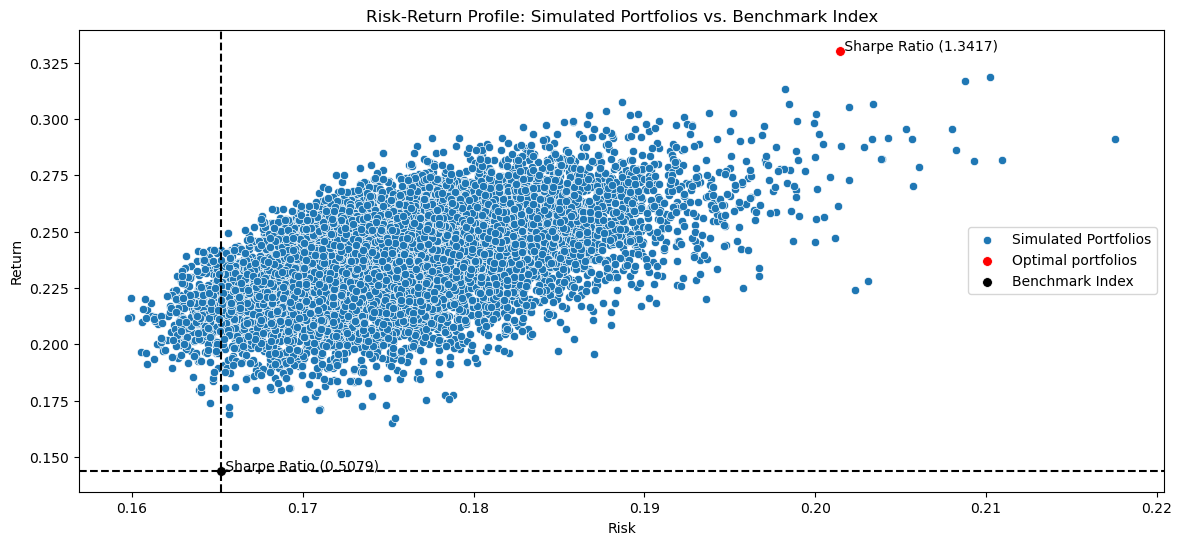

In [78]:
plt.figure(figsize=(14,6))

#simulated portfolios
sns.scatterplot(x=simulatedPortfolios['Standard Deviation'], y=simulatedPortfolios['Mean'], label='Simulated Portfolios')

#optimal portfolio
sns.scatterplot(x=optimalPortfolio['Standard Deviation'], y=optimalPortfolio['Mean'], color='r', s=50, label='Optimal portfolios')
plt.annotate(f" Sharpe Ratio ({optimalPortfolio['Sharpe Ratio'].values[0].round(4)})", (optimalPortfolio['Standard Deviation'], optimalPortfolio['Mean']))

#benchmark index
sns.scatterplot(x=riskReturnProfile_i['Standard Deviation'], y=riskReturnProfile_i['Mean'], color='k', s=50, label='Benchmark Index')
plt.annotate(f" Sharpe Ratio ({riskReturnProfile_i['Sharpe Ratio'].values[0].round(4)})", (riskReturnProfile_i['Standard Deviation'], riskReturnProfile_i['Mean']))
plt.axvline(riskReturnProfile_i['Standard Deviation'].values[0], color='k', linestyle='--')
plt.axhline(riskReturnProfile_i['Mean'].values[0], color='k', linestyle='--')

plt.title('Risk-Return Profile: Simulated Portfolios vs. Benchmark Index')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend()
plt.show()

In [ ]:
Creating a Passive Investment Fund using the optimalWeights

In [83]:
#Collecting the Data 
startDate , endDate = date(2023,1,1), date(2023,12,31)
spotData = yf.download(tickers = stockTickers,start = startDate, end = endDate)['Adj Close'].fillna(method = 'bfill')
indexData = yf.download(tickers = '^NSEI', start = startDate,end = endDate)['Adj Close'].fillna(method = 'bfill')

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


In [116]:
spotReturns_p = Returns(data = spotData).DiscretePropotionalReturns()
spotReturns_p

Ticker,AXISBANK.NS,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2023-01-03,0.021984,0.005040,0.006539,-0.001219,-0.000952,-0.005258,-0.000239,-0.007318,0.000327,0.015300
2023-01-04,-0.005040,-0.007094,-0.017873,-0.002496,-0.018226,-0.012383,-0.008808,-0.015056,-0.011757,0.000996
2023-01-05,-0.008251,-0.005790,-0.006428,-0.022189,-0.013112,0.019725,0.008114,-0.001787,-0.000165,-0.001071
2023-01-06,-0.010163,-0.013753,-0.003313,-0.010294,-0.018099,0.004798,-0.000383,0.009089,-0.007354,-0.030066
2023-01-09,0.020055,0.029397,0.001944,0.003735,0.024819,0.008954,0.016846,0.023611,0.011737,0.033753
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.006482,0.011913,-0.009397,-0.010056,0.017513,0.008307,0.015712,0.000976,-0.010874,0.009637
2023-12-26,0.005467,0.010409,0.006943,0.000805,-0.012125,0.002746,0.003479,0.005068,0.002042,-0.007440
2023-12-27,0.011058,0.021353,0.012393,0.007185,0.014994,0.001424,0.015458,0.003413,0.016456,0.004123


#### **01:Investment Funds : Passive (Tactical Allocation) | Investment strategy: Buy and Hold**


In [97]:
## Allocating the Funds by refering to the Simulated optimal Weights
assetAllocation = pd.DataFrame()
assetAllocation['Purchase Price'] = spotData.head(1).transpose() # Day one Current Market price of of All Stock in Data
assetAllocation['Allocation'] = optimalPortfolio['Weights'].values[0]   # Assigning the Optial Weights to the fund
assetAllocation['Intial Investment'] = investmentFund * assetAllocation['Allocation'] #Allocating the Funds to each stock  based on Optimal Weights genrated by Simulations
assetAllocation['Purchase Quantity'] = round(assetAllocation['Intial Investment'] / assetAllocation['Purchase Price']) # Calculating the no .of shares can buy with allocated funds
assetAllocation['Intial Investment'] = round(assetAllocation['Purchase Quantity'] * assetAllocation['Purchase Price'],2) #Arriving at Total Invested corpus of funds
assetAllocation['Sale Price'] = spotData.tail(1).transpose() # CMP of Last day in the Timeperiod 
assetAllocation['Profit ($)'] =  round((assetAllocation['Sale Price'] - assetAllocation['Purchase Price']) * assetAllocation['Purchase Quantity'],2) # Calculating the profit for each stock 
assetAllocation['Profit (%)'] = (assetAllocation['Profit ($)'] / assetAllocation['Intial Investment']) * 100 # converting Absolute profit it into percentage
assetAllocation


,Purchase Price,Allocation,Intial Investment,Purchase Quantity,Sale Price,Profit ($),Profit (%)
Ticker,,,,,,,
AXISBANK.NS,938.942200,0.098321,9831663.77,10471.0,1101.449951,1701618.67,17.307535
BHARTIARTL.NS,809.780334,0.148261,14826268.14,18309.0,1032.199951,4072280.76,27.466661
HDFCBANK.NS,1588.541626,0.019910,1990442.66,1253.0,1686.223877,122395.86,6.149178
ICICIBANK.NS,887.742920,0.040266,4026801.88,4536.0,996.599976,493775.60,12.262227
INFY.NS,1476.252075,0.017109,1710976.16,1159.0,1534.253052,67223.13,3.928934
ITC.NS,315.368134,0.130096,13009566.24,41252.0,447.474670,5449658.86,41.889628
LT.NS,2049.974121,0.084851,8484842.89,4139.0,3498.498779,5995443.56,70.660631
RELIANCE.NS,2369.185791,0.019993,1999592.81,844.0,2584.949951,182104.95,9.107102
SBIN.NS,590.625610,0.384985,38498749.16,65183.0,631.460632,2661749.24,6.913859


#### __Remaining Funds__

In [88]:
cashLeftover = investmentFund- assetAllocation['Intial Investment'].sum()
print('CashLeftOver', cashLeftover)

CashLeftOver 394.391357421875


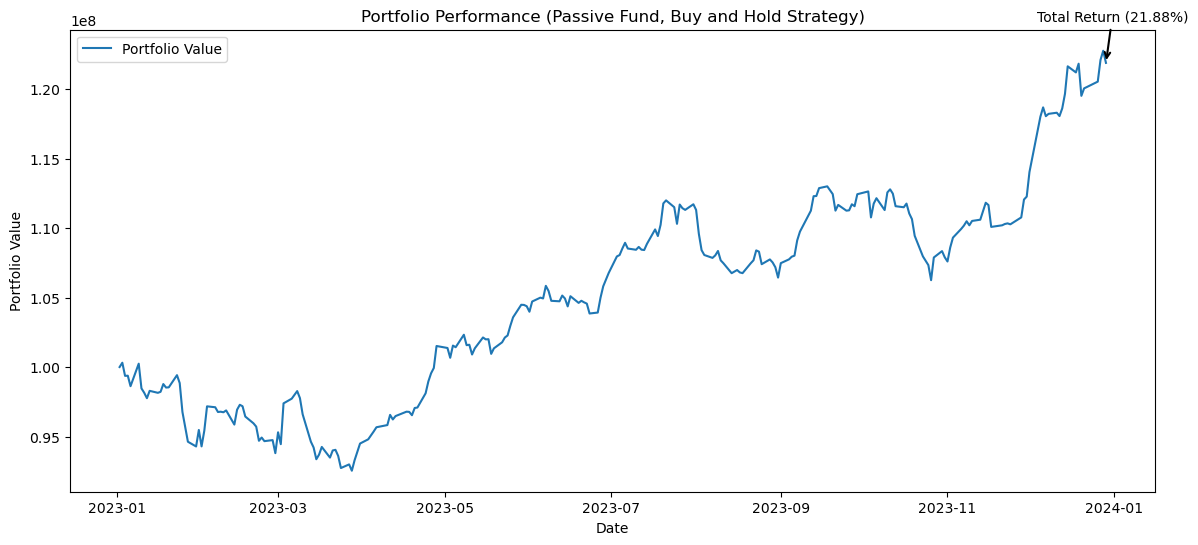

In [98]:

# Calculate total returns
total_return = (spotData.tail(1).values * assetAllocation['Purchase Quantity'].values).sum()
total_return_percentage = ((total_return - assetAllocation['Intial Investment'].sum()) / assetAllocation['Intial Investment'].sum()) * 100


# Plot portfolio performance
plt.figure(figsize=[14, 6])
portfolio_values = (spotData * assetAllocation['Purchase Quantity']).sum(axis=1)
plt.plot(spotData.index, portfolio_values, label='Portfolio Value')
plt.title('Portfolio Performance (Passive Fund, Buy and Hold Strategy)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')

# Annotate the plot
last_date = spotData.tail(1).index[0]
last_value = portfolio_values[-1]
plt.annotate(f"Total Return ({round(total_return_percentage, 2)}%)", 
             xy=(last_date, last_value), 
             xytext=(-50, 30), 
             textcoords='offset points', 
             arrowprops=dict(arrowstyle='->', lw=1.5))

plt.legend()
plt.show()


#### __Calculation of VaR using Historical Simulation Method__


#####  __VaR (Value at Risk)__

`Value at Risk (VaR) measures the potential risk of an investment or portfolio over a specified time horizon with a given confidence interval under normal market conditions. It estimates the maximum potential loss that may occur with a certain level of confidence, providing a quantifiable metric for risk management.`


##### __Advantages of Historical Simulation__

`Simplicity:`
Easy to understand and implement without requiring complex mathematical models.

`Non-parametric:`
Does not assume a normal distribution of returns, making it flexible for different types of data.

`Captures Actual Market Conditions:`
Reflects real historical market movements and conditions.

#### __Disadvantages of Historical Simulation__

`Historical Dependence:`
Assumes that past market behavior will repeat in the future, which may not always be true.

`Data Intensive:`
Requires a substantial amount of historical data for accurate results.

`Ignores New Risks:`
Does not account for new risks or structural changes in the market that have not occurred in the historical data.

#### Why VaR ?

`1. Risk Quantification:`
VaR provides a quantifiable measure of potential losses in a portfolio over a specified time period and confidence level. This helps in understanding and communicating the risk involved in an investment.

`2. Regulatory Compliance:`
Financial institutions are often required by regulators to measure and report VaR to ensure they maintain adequate capital reserves against potential losses. This helps in maintaining the stability of the financial system.

`3. Risk Management:`
VaR is a critical tool for risk managers to identify and mitigate potential risks. By knowing the potential maximum loss, they can make informed decisions about hedging, diversifying, or adjusting the portfolio to manage risk better.

`4. Performance Assessment:`
VaR allows investors to compare the risk-adjusted performance of different portfolios or investment strategies. A portfolio with a high return but also high VaR might be less attractive than one with a slightly lower return but significantly lower VaR.

`5. Strategic Decision Making:`
Investors and portfolio managers use VaR to make strategic decisions about asset allocation and risk exposure. It helps in determining the amount of risk that is acceptable for achieving investment goals.

`6. Stress Testing:`
VaR can be used in stress testing scenarios to evaluate how a portfolio might perform under extreme market conditions. This helps in preparing for adverse market movements and planning for worst-case scenarios.

`7. Risk-Adjusted Return:`
VaR is often used in conjunction with other metrics like the Sharpe Ratio to assess the risk-adjusted return of an investment. This helps in identifying investments that offer the best return for a given level of risk.formed decision-making and regulatory compliance.

In [150]:
assetAllocation

,Purchase Price,Allocation,Intial Investment,Purchase Quantity,Sale Price,Profit ($),Profit (%)
Ticker,,,,,,,
AXISBANK.NS,938.942200,0.098321,9831663.77,10471.0,1101.449951,1701618.67,17.307535
BHARTIARTL.NS,809.780334,0.148261,14826268.14,18309.0,1032.199951,4072280.76,27.466661
HDFCBANK.NS,1588.541626,0.019910,1990442.66,1253.0,1686.223877,122395.86,6.149178
ICICIBANK.NS,887.742920,0.040266,4026801.88,4536.0,996.599976,493775.60,12.262227
INFY.NS,1476.252075,0.017109,1710976.16,1159.0,1534.253052,67223.13,3.928934
ITC.NS,315.368134,0.130096,13009566.24,41252.0,447.474670,5449658.86,41.889628
LT.NS,2049.974121,0.084851,8484842.89,4139.0,3498.498779,5995443.56,70.660631
RELIANCE.NS,2369.185791,0.019993,1999592.81,844.0,2584.949951,182104.95,9.107102
SBIN.NS,590.625610,0.384985,38498749.16,65183.0,631.460632,2661749.24,6.913859


In [133]:
#Collecting the Data 
startDate , endDate = date(2023,1,1), date(2023,12,31)
spotData = yf.download(tickers = stockTickers,start = startDate, end = endDate)['Adj Close'].fillna(method = 'bfill')
indexData = yf.download(tickers = '^NSEI', start = startDate,end = endDate)['Adj Close'].fillna(method = 'bfill')

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


In [134]:
spotReturns_p = Returns(data = spotData).DiscretePropotionalReturns()
spotReturns_p

Ticker,AXISBANK.NS,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2023-01-03,0.021984,0.005040,0.006539,-0.001219,-0.000952,-0.005258,-0.000239,-0.007318,0.000327,0.015300
2023-01-04,-0.005040,-0.007094,-0.017873,-0.002496,-0.018226,-0.012383,-0.008808,-0.015056,-0.011757,0.000996
2023-01-05,-0.008251,-0.005790,-0.006428,-0.022189,-0.013112,0.019725,0.008114,-0.001787,-0.000165,-0.001071
2023-01-06,-0.010163,-0.013753,-0.003313,-0.010294,-0.018099,0.004798,-0.000383,0.009089,-0.007354,-0.030066
2023-01-09,0.020055,0.029397,0.001944,0.003735,0.024819,0.008954,0.016846,0.023611,0.011737,0.033753
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.006482,0.011913,-0.009397,-0.010056,0.017513,0.008307,0.015712,0.000976,-0.010874,0.009637
2023-12-26,0.005467,0.010409,0.006943,0.000805,-0.012125,0.002746,0.003479,0.005068,0.002042,-0.007440
2023-12-27,0.011058,0.021353,0.012393,0.007185,0.014994,0.001424,0.015458,0.003413,0.016456,0.004123


In [135]:
Weights = optimalPortfolio['Weights'].values[0]
portfolio_returns = spotReturns_p.dot(Weights)
portfolio_returns

Date
2023-01-03    0.003109
2023-01-04   -0.009445
2023-01-05    0.000180
2023-01-06   -0.007576
2023-01-09    0.016426
                ...   
2023-12-22   -0.000375
2023-12-26    0.003165
2023-12-27    0.013178
2023-12-28    0.005545
2023-12-29   -0.007827
Length: 244, dtype: float64

In [149]:
confidence_level= 0.99
relativeVaR = np.percentile(portfolio_returns,1 - confidence_level) * 100
absoluteVaR = total_return * relativeVaR
print(f" relative VaR at {confidence_level*100}% confidence level: {relativeVaR}",
      f" Absolute VaR at {confidence_level*100}% confidence level: {absoluteVaR}")

 relative VaR at 99.0% confidence level: -2.2982655992263012  Absolute VaR at 99.0% confidence level: -280111560.37069345
